In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

import pandas as pd
import numpy as np
'''
# Load the CSV data
data = pd.read_csv(/content/combined-files.csv)

# Split the data into features and labels
X = data.iloc[:,:-1].values  # Features
y = data.iloc[:,-1].values  # Labels
print(y)

# Convert class labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X
print(y)
print(X)
'''

'\n# Load the CSV data\ndata = pd.read_csv(/content/combined-files.csv)\n\n# Split the data into features and labels\nX = data.iloc[:,:-1].values  # Features\ny = data.iloc[:,-1].values  # Labels\nprint(y)\n\n# Convert class labels to integers\nlabel_encoder = LabelEncoder()\ny = label_encoder.fit_transform(y)\n\nX\nprint(y)\nprint(X)\n'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the CSV data
data = pd.read_csv("/content/combined-files.csv")

# Split the data into features and labels
X = data.iloc[:,:-1].values  # Features
y = data.iloc[:,-1].values  # Labels
print(y)
# Convert class labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
np.random.seed(42)
# Perform data augmentation (e.g., noise injection)
noise_level = 0.001  # Adjust as needed
X_noisy = X + np.random.normal(loc=0, scale=noise_level, size=X.shape)
X_noisy = np.clip(X_noisy, 0, 1)  # Ensure values remain within valid ranges

# Concatenate original and augmented data
X_augmented = np.vstack((X, X_noisy))
y_augmented = np.hstack((y, y))  # Assuming equal number of data in each class

# Split the augmented data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

print(y)
print(X)


['normal' 'normal' 'normal' ... 'ictal' 'ictal' 'ictal']
[2 2 2 ... 0 0 0]
[[  22  -50  -22 ...  -42   55  -71]
 [  35  -64  -17 ...  -39   38 -120]
 [  45  -91  -24 ...  -47   -5 -150]
 ...
 [  57  512 -721 ... -118  246 -155]
 [  95  130 -491 ... -163  556    6]
 [ 462  196  910 ...  -56  276 -221]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


print(y_augmented)
print(X_augmented)

[2 2 2 ... 0 0 0]
[[  22.  -50.  -22. ...  -42.   55.  -71.]
 [  35.  -64.  -17. ...  -39.   38. -120.]
 [  45.  -91.  -24. ...  -47.   -5. -150.]
 ...
 [   1.    1.    0. ...    0.    1.    0.]
 [   1.    1.    0. ...    0.    1.    1.]
 [   1.    1.    1. ...    0.    1.    0.]]


In [ ]:
X = X.astype('float32')
X

array([[  22.,  -50.,  -22., ...,  -42.,   55.,  -71.],
       [  35.,  -64.,  -17., ...,  -39.,   38., -120.],
       [  45.,  -91.,  -24., ...,  -47.,   -5., -150.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# Split the data into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Reshape the data for CNN input (assuming 1D CNN)
input_shape = (X_train.shape[1], 1)  # Shape: (number of features, 1)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_val = X_val.reshape(-1, X_val.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Define the number of classes
num_classes = 3  # Assuming three classes

# Define the CNN architecture
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(num_classes, activation='softmax')  # Using softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Using sparse categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/100
1025/1025 [==============================] - 23s 21ms/step - loss: 2.1825 - accuracy: 0.8856 - val_loss: 1.1215 - val_accuracy: 0.9617
Epoch 2/100
1025/1025 [==============================] - 22s 22ms/step - loss: 1.1374 - accuracy: 0.9202 - val_loss: 0.7773 - val_accuracy: 0.9351
Epoch 3/100
1025/1025 [==============================] - 22s 22ms/step - loss: 1.2878 - accuracy: 0.9183 - val_loss: 1.3157 - val_accuracy: 0.9109
Epoch 4/100
1025/1025 [==============================] - 21s 20ms/step - loss: 1.0719 - accuracy: 0.9398 - val_loss: 0.6704 - val_accuracy: 0.9580
Epoch 5/100
1025/1025 [==============================] - 22s 21ms/step - loss: 0.6473 - accuracy: 0.9536 - val_loss: 0.4289 - val_accuracy: 0.9651
Epoch 6/100
1025/1025 [==============================] - 20s 19ms/step - loss: 0.7915 - accuracy: 0.9445 - val_loss: 0.6991 - val_accuracy: 0.9600
Epoch 7/100
1025/1025 [==============================] - 22s 21ms/step - loss: 0.7164 - accuracy: 0.9437 - val_loss: 0

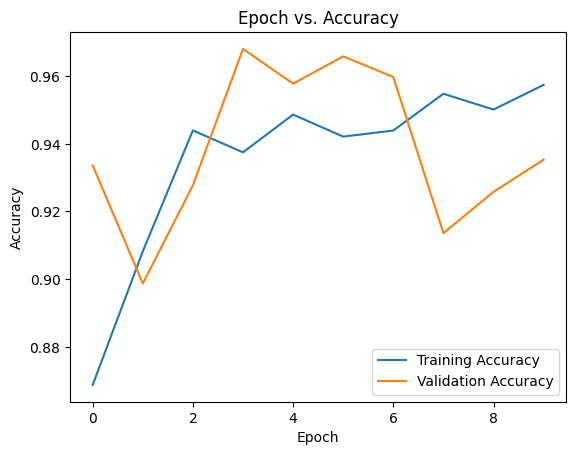

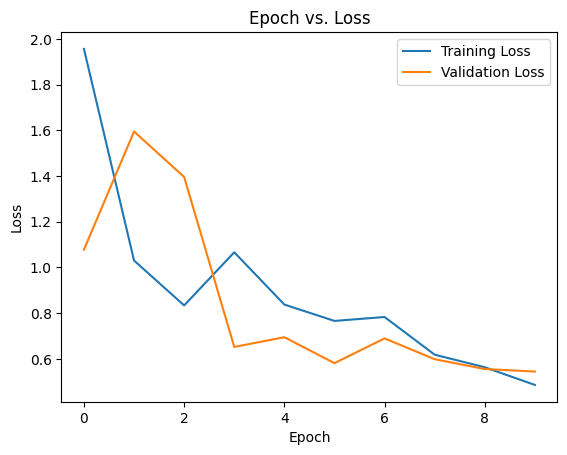

In [ ]:
import matplotlib.pyplot as plt

# Plot epoch vs. accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot epoch vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Get predicted values for X_test
predictions = model.predict(X_test)

# The predictions will be in probability form, you can convert them to class labels
y_pred= np.argmax(predictions, axis=1)
print(y_pred)
dic={0:'ictal',1:'inter-ictal',2:'normal'}
y_labels=[dic[i] for i in y_pred ]
print("Predicted classes:", y_labels)





129/129 [==============================] - 1s 5ms/step
[2 1 2 ... 0 1 2]
Predicted classes: ['normal', 'inter-ictal', 'normal', 'ictal', 'inter-ictal', 'inter-ictal', 'inter-ictal', 'ictal', 'normal', 'ictal', 'inter-ictal', 'normal', 'ictal', 'normal', 'inter-ictal', 'normal', 'ictal', 'normal', 'normal', 'normal', 'ictal', 'inter-ictal', 'normal', 'normal', 'inter-ictal', 'ictal', 'normal', 'inter-ictal', 'inter-ictal', 'ictal', 'ictal', 'ictal', 'ictal', 'inter-ictal', 'normal', 'ictal', 'normal', 'normal', 'normal', 'normal', 'inter-ictal', 'ictal', 'inter-ictal', 'normal', 'normal', 'ictal', 'normal', 'inter-ictal', 'normal', 'normal', 'normal', 'normal', 'ictal', 'inter-ictal', 'ictal', 'inter-ictal', 'inter-ictal', 'normal', 'normal', 'normal', 'normal', 'normal', 'inter-ictal', 'ictal', 'normal', 'normal', 'normal', 'ictal', 'normal', 'inter-ictal', 'inter-ictal', 'ictal', 'ictal', 'ictal', 'inter-ictal', 'inter-ictal', 'inter-ictal', 'normal', 'ictal', 'normal', 'inter-ictal',

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       842
           1       1.00      0.92      0.96      1671
           2       0.88      1.00      0.94      1584

    accuracy                           0.93      4097
   macro avg       0.93      0.92      0.92      4097
weighted avg       0.94      0.93      0.93      4097



[2 1 0 ... 0 1 2]
[2 1 2 ... 0 1 2]
Confusion Matrix:
[[ 703    0  139]
 [  62 1541   68]
 [   0    0 1584]]


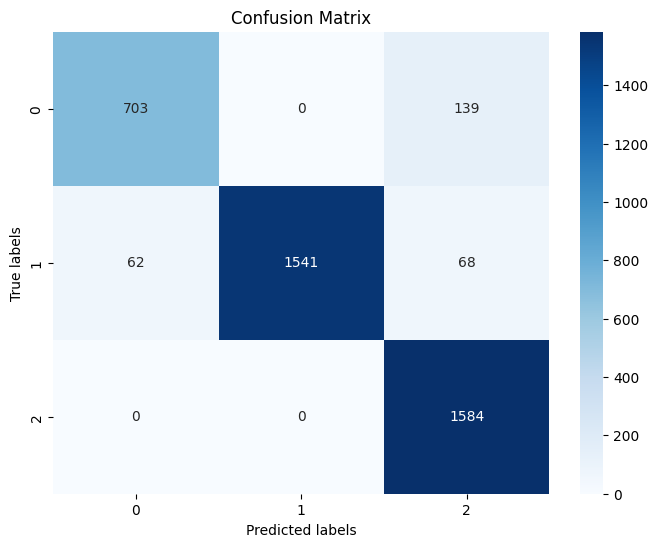

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

# Calculate sensitivity (recall) and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Sensitivity (Recall): [0.83491686 0.92220227 1.        ]
Specificity: [0.98095238 1.         0.91762833]


In [ ]:
# Calculate accuracy for each class
class_accuracy = {}
for i in range(num_classes):
    class_accuracy[i] = cm[i, i] / sum(cm[i, :])

# Print accuracy for each class
for class_label, accuracy in class_accuracy.items():
    print(f'Accuracy for class {dic[class_label]}: {accuracy}')

Accuracy for class ictal: 0.834916864608076
Accuracy for class inter-ictal: 0.9222022740873729
Accuracy for class normal: 1.0


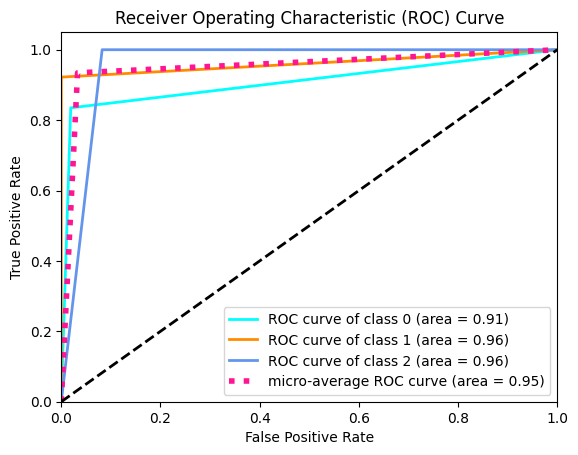

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer


# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Binarize the predicted labels
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))



# Compute ROC curve and ROC area
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()